## Load necessary modules

In [7]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load RetinaNet model

In [8]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('snapshots', 'version8_resplit_test_train', 'resnet50_csv_12_inference.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'Biker', 1: 'Car', 2: 'Bus', 3: 'Cart', 4: 'Skater', 5: 'Pedestrian'}
# labels_to_names = {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

## Run detection on example

In [9]:
sdd_images = os.listdir('/home/priya/Documents/stanford/cs230/keras-retinanet/examples/differents')
print(sdd_images)

['gates_video4_1320.jpg', 'hyang_video6_6920.jpg', 'hyang_video7_280.jpg', 'gates_video3_40.jpg']


In [10]:
def run_detection_image(filepath):
    image = read_image_bgr(filepath)
#     print(image.shape)
#     print(image)

    # copy to draw on
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    # preprocess image for network
    image = preprocess_image(image)
    image, scale = resize_image(image)

    # process image
    start = time.time()
    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
    print("processing time: ", time.time() - start)

    # correct for image scale
    boxes /= scale

    # visualize detections
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        # scores are sorted so we can break
        if score < 0.5:
            break

        color = label_color(label)

        b = box.astype(int)
        draw_box(draw, b, color=color)

        caption = "{} {:.3f}".format(labels_to_names[label], score)
        draw_caption(draw, b, caption)

    plt.figure(figsize=(15, 15))
    plt.axis('off')
    plt.imshow(draw)
    plt.show()
    
    file, ext = os.path.splitext(filepath)
    image_name = file.split('/')[-1] + ext
    output_path = os.path.join('examples/results/', image_name)
    
    draw_conv = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)
    cv2.imwrite(output_path, draw_conv)

In [11]:
# run_detection_image('examples/cars.jpg')

(1982, 1434, 3)
[[[ 77 106  90]
  [ 74 103  87]
  [ 73 102  86]
  ...
  [133 135 169]
  [150 152 186]
  [150 152 186]]

 [[ 80 109  93]
  [ 78 107  91]
  [ 76 105  89]
  ...
  [148 150 184]
  [161 163 197]
  [161 163 197]]

 [[ 86 115  99]
  [ 84 113  97]
  [ 82 111  95]
  ...
  [173 175 209]
  [178 180 214]
  [178 180 214]]

 ...

 [[176 180 185]
  [187 190 195]
  [196 198 206]
  ...
  [179 185 222]
  [167 173 210]
  [167 173 210]]

 [[175 179 184]
  [186 189 194]
  [195 197 205]
  ...
  [198 204 241]
  [188 194 231]
  [188 194 231]]

 [[174 178 183]
  [186 189 194]
  [194 196 204]
  ...
  [194 200 237]
  [191 197 234]
  [191 197 234]]]
processing time:  0.6829385757446289


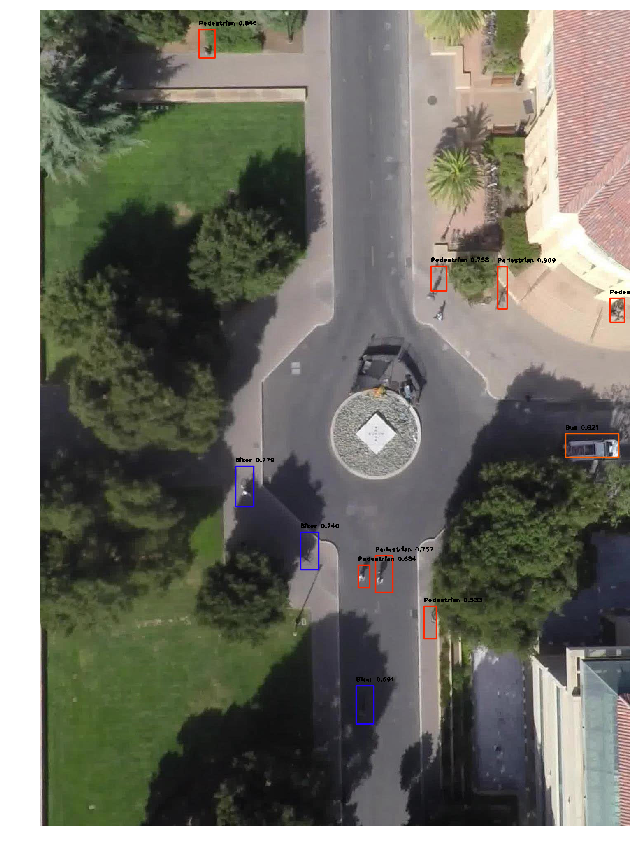

(848, 1416, 3)
[[[ 88  75  73]
  [ 89  77  75]
  [ 95  83  81]
  ...
  [191 196 199]
  [189 194 197]
  [186 191 194]]

 [[ 89  76  74]
  [ 88  76  74]
  [ 92  80  78]
  ...
  [188 193 196]
  [187 192 195]
  [185 190 193]]

 [[ 90  77  75]
  [ 86  74  72]
  [ 89  77  75]
  ...
  [185 190 193]
  [185 190 193]
  [184 189 192]]

 ...

 [[128 126 126]
  [195 193 193]
  [224 224 224]
  ...
  [162 174 176]
  [164 176 178]
  [174 186 188]]

 [[127 125 125]
  [196 194 194]
  [226 226 226]
  ...
  [157 169 171]
  [159 171 173]
  [171 183 185]]

 [[126 124 124]
  [196 194 194]
  [227 227 227]
  ...
  [155 167 169]
  [158 170 172]
  [171 183 185]]]
processing time:  0.06805014610290527


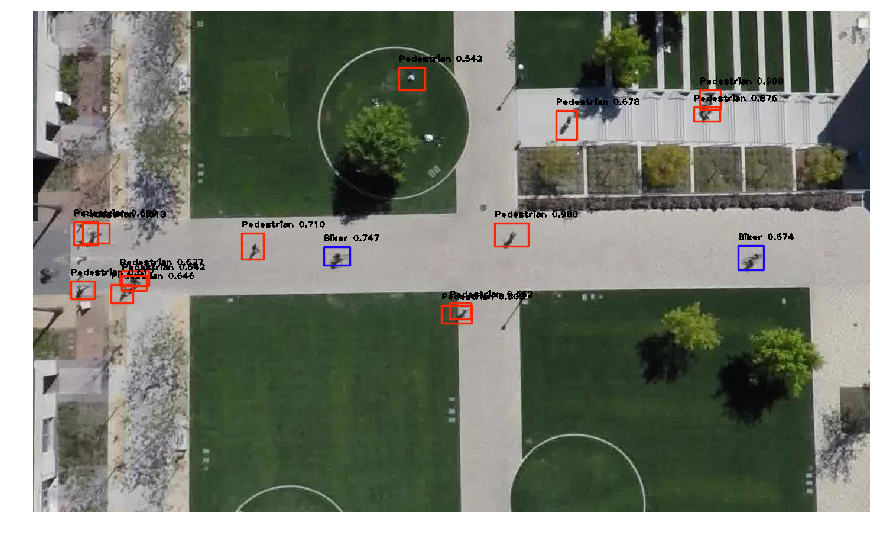

(1940, 1450, 3)
[[[ 48  90  72]
  [ 48  90  72]
  [ 48  90  72]
  ...
  [ 32  28  27]
  [ 32  28  27]
  [ 32  28  27]]

 [[ 47  89  71]
  [ 47  89  71]
  [ 47  89  71]
  ...
  [ 30  26  25]
  [ 30  26  25]
  [ 30  26  25]]

 [[ 47  89  71]
  [ 47  89  71]
  [ 47  89  71]
  ...
  [ 28  24  23]
  [ 28  24  23]
  [ 28  24  23]]

 ...

 [[113 150 142]
  [106 140 133]
  [ 97 131 124]
  ...
  [ 89  82  85]
  [119 112 115]
  [119 112 115]]

 [[108 145 137]
  [ 93 127 120]
  [ 80 114 107]
  ...
  [ 93  86  89]
  [125 118 121]
  [125 118 121]]

 [[103 140 132]
  [ 87 121 114]
  [ 76 110 103]
  ...
  [ 95  88  91]
  [128 121 124]
  [128 121 124]]]
processing time:  0.06471443176269531


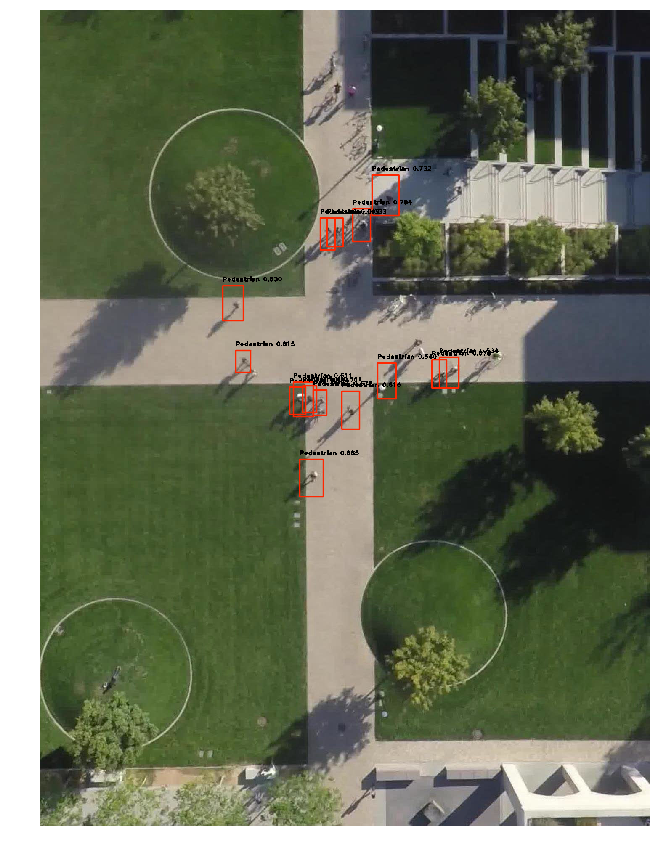

(2002, 1432, 3)
[[[170 177 216]
  [174 181 220]
  [179 186 225]
  ...
  [141 136 167]
  [139 134 165]
  [134 129 160]]

 [[156 163 202]
  [160 167 206]
  [165 172 211]
  ...
  [127 122 153]
  [119 114 145]
  [111 106 137]]

 [[161 168 207]
  [165 172 211]
  [170 177 216]
  ...
  [100  95 126]
  [ 88  83 114]
  [ 77  72 103]]

 ...

 [[ 29  29  29]
  [ 29  29  29]
  [ 29  29  29]
  ...
  [ 84 153 150]
  [ 87 156 153]
  [ 85 154 151]]

 [[ 28  28  28]
  [ 28  28  28]
  [ 28  28  28]
  ...
  [ 83 152 149]
  [ 83 152 149]
  [ 83 152 149]]

 [[ 28  28  28]
  [ 28  28  28]
  [ 28  28  28]
  ...
  [ 83 152 149]
  [ 83 152 149]
  [ 83 152 149]]]
processing time:  0.059752702713012695


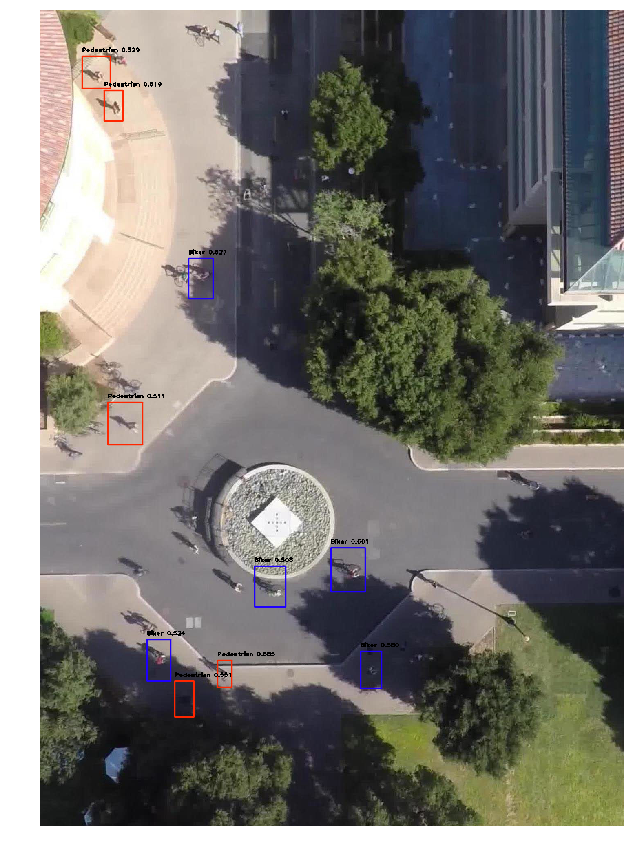

In [12]:
base_path = 'examples/differents//'

for image in sdd_images:
    run_detection_image(os.path.join(base_path,image))